In [55]:
# linear algebra
import numpy as np

# data processing
import pandas as pd

# data visualization 
import matplotlib.pyplot as plt

# Algorithms
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Perceptron
from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler


# Data Preprocessing

In [56]:
data = pd.read_excel('divorce.xlsx')

In [57]:
data.head()

,Atr1,Atr2,Atr3,Atr4,Atr5,Atr6,Atr7,Atr8,Atr9,Atr10,...,Atr46,Atr47,Atr48,Atr49,Atr50,Atr51,Atr52,Atr53,Atr54,Class
0,2,2,4,1,0,0,0,0,0,0,...,2,1,3,3,3,2,3,2,1,1
1,4,4,4,4,4,0,0,4,4,4,...,2,2,3,4,4,4,4,2,2,1
2,2,2,2,2,1,3,2,1,1,2,...,3,2,3,1,1,1,2,2,2,1
3,3,2,3,2,3,3,3,3,3,3,...,2,2,3,3,3,3,2,2,2,1
4,2,2,1,1,1,1,0,0,0,0,...,2,1,2,3,2,2,2,1,0,1


In [58]:
X = data.iloc[:,:-1]

In [59]:
X.head()

,Atr1,Atr2,Atr3,Atr4,Atr5,Atr6,Atr7,Atr8,Atr9,Atr10,...,Atr45,Atr46,Atr47,Atr48,Atr49,Atr50,Atr51,Atr52,Atr53,Atr54
0,2,2,4,1,0,0,0,0,0,0,...,3,2,1,3,3,3,2,3,2,1
1,4,4,4,4,4,0,0,4,4,4,...,2,2,2,3,4,4,4,4,2,2
2,2,2,2,2,1,3,2,1,1,2,...,2,3,2,3,1,1,1,2,2,2
3,3,2,3,2,3,3,3,3,3,3,...,3,2,2,3,3,3,3,2,2,2
4,2,2,1,1,1,1,0,0,0,0,...,2,2,1,2,3,2,2,2,1,0


In [60]:
Y = data.iloc[:,-1]

In [61]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: Class, dtype: int64

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, Y, test_size=0.30, random_state=1)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, Y, test_size=0.40, random_state=1)

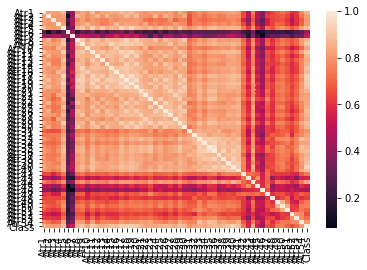

In [63]:
import seaborn as sns
auto_data = data
corr = auto_data.corr()
sns.heatmap(corr, 
 xticklabels=corr.columns,
 yticklabels=corr.columns)

# Perceptron

In [64]:
pn1 = Perceptron(tol=1e-3, random_state=0)
pn2 = Perceptron(tol=1e-3, random_state=0)
pn3 = Perceptron(tol=1e-3, random_state=0)

pn1.fit(X_train, y_train)
pn2.fit(X_train1,y_train1)
pn3.fit(X_train2,y_train2)

Perceptron()

In [65]:
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(y_test,pn1.predict(X_test))
cm2 = confusion_matrix(y_test1,pn2.predict(X_test1))
cm3 = confusion_matrix(y_test2,pn3.predict(X_test2))
print(cm1)
print(cm2)
print(cm3)

[[19  0]
 [ 1 14]]
[[23  0]
 [ 2 26]]
[[34  0]
 [ 1 33]]


In [66]:
ee=accuracy_score(y_test,pn1.predict(X_test))
rr=accuracy_score(y_test1,pn2.predict(X_test1))
cc=accuracy_score(y_test2,pn3.predict(X_test2))

In [67]:
print(ee,rr,cc)

0.9705882352941176 0.9607843137254902 0.9852941176470589


# Random Forest Classifier

In [68]:
clf1=RandomForestClassifier()
clf2=RandomForestClassifier()
clf3=RandomForestClassifier()

clf1.fit(X_train,y_train)
clf2.fit(X_train1,y_train1)
clf3.fit(X_train2,y_train2)

RandomForestClassifier()

In [69]:
# Comfusion Matrix 

In [70]:
cmm1 = confusion_matrix(y_test,clf1.predict(X_test))
cmm2 = confusion_matrix(y_test1,clf2.predict(X_test1))
cmm3 = confusion_matrix(y_test2,clf3.predict(X_test2))
print(cmm1)
print(cmm2)
print(cmm3)

[[19  0]
 [ 2 13]]
[[23  0]
 [ 2 26]]
[[34  0]
 [ 2 32]]


In [71]:
a=accuracy_score(y_test,clf1.predict(X_test))
b=accuracy_score(y_test1,clf2.predict(X_test1))
c=accuracy_score(y_test2,clf3.predict(X_test2))

In [72]:
print(a,b,c)

0.9411764705882353 0.9607843137254902 0.9705882352941176


# Naive Bayes Classifier

In [73]:
gnb1 = GaussianNB()
gnb2 = GaussianNB()
gnb3 = GaussianNB()

gnb1.fit(X_train,y_train)
gnb2.fit(X_train1,y_train1)
gnb3.fit(X_train2,y_train2)

GaussianNB()

In [74]:
# Comfusion Matrix 

In [75]:
cmmm1 = confusion_matrix(y_test,gnb1.predict(X_test))
cmmm2 = confusion_matrix(y_test1,gnb2.predict(X_test1))
cmmm3 = confusion_matrix(y_test2,gnb3.predict(X_test2))
print(cmmm1)
print(cmmm2)
print(cmmm3)

[[19  0]
 [ 2 13]]
[[23  0]
 [ 2 26]]
[[34  0]
 [ 2 32]]


In [76]:
d=accuracy_score(y_test,gnb1.predict(X_test))
e=accuracy_score(y_test1,gnb2.predict(X_test1))
f=accuracy_score(y_test2,gnb3.predict(X_test2))

print(d,e,f)

0.9411764705882353 0.9607843137254902 0.9705882352941176


# Support Vector Machine 

In [77]:
cl1 = svm.SVC(gamma='scale')
cl2 = svm.SVC(gamma='scale')
cl3 = svm.SVC(gamma='scale')

cl1.fit(X_train,y_train)
cl2.fit(X_train1,y_train1)
cl3.fit(X_train2,y_train2)

SVC()

In [78]:
# Comfusion Matrix 

In [79]:
cmmmm1 = confusion_matrix(y_test,cl1.predict(X_test))
cmmmm2 = confusion_matrix(y_test1,cl2.predict(X_test1))
cmmmm3 = confusion_matrix(y_test2,cl3.predict(X_test2))
print(cmmmm1)
print(cmmmm2)
print(cmmmm3)

[[19  0]
 [ 2 13]]
[[23  0]
 [ 2 26]]
[[34  0]
 [ 2 32]]


In [80]:
g=accuracy_score(y_test,cl1.predict(X_test))
h=accuracy_score(y_test1,cl2.predict(X_test1))
i=accuracy_score(y_test2,cl3.predict(X_test2))

print(g,h,i)

0.9411764705882353 0.9607843137254902 0.9705882352941176


# Logistic Regression


In [81]:
result1 = LogisticRegression(random_state = 0)
result2 = LogisticRegression(random_state = 0)
result3 = LogisticRegression(random_state = 0)

result1.fit(X_train,y_train)
result2.fit(X_train1,y_train1)
result3.fit(X_train2,y_train2)



LogisticRegression(random_state=0)

In [82]:
# Comfusion Matrix 

In [83]:
cm4 = confusion_matrix(y_test,result1.predict(X_test))
cm5 = confusion_matrix(y_test1,result2.predict(X_test1))
cm6 = confusion_matrix(y_test2,result3.predict(X_test2))
print(cm4)
print(cm5)
print(cm6)

[[19  0]
 [ 2 13]]
[[23  0]
 [ 2 26]]
[[34  0]
 [ 2 32]]


In [84]:
j=accuracy_score(y_test,result1.predict(X_test))
k=accuracy_score(y_test1,result2.predict(X_test1))
l=accuracy_score(y_test2,result3.predict(X_test2))
print(j,k,l)

0.9411764705882353 0.9607843137254902 0.9705882352941176


# Decision Tree 

In [85]:
clff1 = DecisionTreeClassifier(random_state=0)
clff2 = DecisionTreeClassifier(random_state=0)
clff3 = DecisionTreeClassifier(random_state=0)

clff1.fit(X_train,y_train)
clff2.fit(X_train1,y_train1)
clff3.fit(X_train2,y_train2)



DecisionTreeClassifier(random_state=0)

In [86]:
# Comfusion Matrix 

In [87]:
from sklearn.metrics import confusion_matrix
cmm4 = confusion_matrix(y_test,clff1.predict(X_test))
cmm5 = confusion_matrix(y_test1,clff2.predict(X_test1))
cmm6 = confusion_matrix(y_test2,clff3.predict(X_test2))
print(cmm4)
print(cmm5)
print(cmm6)

[[19  0]
 [ 2 13]]
[[23  0]
 [ 2 26]]
[[33  1]
 [ 2 32]]


In [88]:
m=accuracy_score(y_test,clff1.predict(X_test))
n=accuracy_score(y_test1,clff2.predict(X_test1))
o=accuracy_score(y_test2,clff3.predict(X_test2))

print(m,n,o)

0.9411764705882353 0.9607843137254902 0.9558823529411765


# KNN

In [89]:
from sklearn.neighbors import KNeighborsClassifier

knn1 = KNeighborsClassifier(n_neighbors = 15)
knn2 = KNeighborsClassifier(n_neighbors = 15)
knn3 = KNeighborsClassifier(n_neighbors = 15)

knn1.fit(X_train, y_train)
knn2.fit(X_train1, y_train1)
knn3.fit(X_train2, y_train2)

#y_pred = knn.predict(X_test)
#print("Accuracy = ",((np.sum(y_pred==y_test)/y_test.shape[0])*100),"%",sep="")

KNeighborsClassifier(n_neighbors=15)

In [90]:
cmmm4 = confusion_matrix(y_test,knn1.predict(X_test))
cmmm5 = confusion_matrix(y_test1,knn2.predict(X_test1))
cmmm6 = confusion_matrix(y_test2,knn3.predict(X_test2))
print(cmmm4)
print(cmmm5)
print(cmmm6)

[[19  0]
 [ 2 13]]
[[23  0]
 [ 2 26]]
[[34  0]
 [ 2 32]]


In [91]:
p=accuracy_score(y_test,knn1.predict(X_test))
q=accuracy_score(y_test1,knn2.predict(X_test1))
r=accuracy_score(y_test2,knn3.predict(X_test2))

print(p,q,r)

0.9411764705882353 0.9607843137254902 0.9705882352941176


# Pipeline

In [92]:
p1=Pipeline([('sc1',StandardScaler()),('pca1',LDA()),('lr1',Perceptron())])
p2=Pipeline([('sc1',StandardScaler()),('pca1',LDA()),('lr1',Perceptron())])
p3=Pipeline([('sc1',StandardScaler()),('pca1',LDA()),('lr1',Perceptron())])

In [93]:
p1.fit(X_train,y_train)
p2.fit(X_train1, y_train1)
p3.fit(X_train2, y_train2)

Pipeline(steps=[('sc1', StandardScaler()),
                ('pca1', LinearDiscriminantAnalysis()), ('lr1', Perceptron())])

In [94]:
cmmmm4 = confusion_matrix(y_test,knn1.predict(X_test))
cmmmm5 = confusion_matrix(y_test1,knn2.predict(X_test1))
cmmmm6 = confusion_matrix(y_test2,knn3.predict(X_test2))
print(cmmmm4)
print(cmmmm5)
print(cmmmm6)

[[19  0]
 [ 2 13]]
[[23  0]
 [ 2 26]]
[[34  0]
 [ 2 32]]


In [95]:
s=accuracy_score(y_test,knn1.predict(X_test))
t=accuracy_score(y_test1,knn2.predict(X_test1))
q=accuracy_score(y_test2,knn3.predict(X_test2))

print(s,t,q)

0.9411764705882353 0.9607843137254902 0.9705882352941176
